Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import model_from_json, Sequential
from keras.layers import LSTM, Dense, Dropout

Calling the reconstructed data

In [2]:
training = pd.read_csv('train.csv')
testing = pd.read_csv('test.csv')

In [3]:
training

,Date and time,Gear oil temperature (°C),"Gear oil temperature, Max (°C)","Gear oil temperature, Min (°C)","Gear oil temperature, Standard deviation (°C)"
0,01-01-2020 00:00,56.972500,57.099998,56.799999,9.549207e-02
1,01-01-2020 00:10,56.695001,56.750000,56.599998,3.840561e-02
2,01-01-2020 00:20,56.640000,56.700001,56.400002,6.819121e-02
3,01-01-2020 00:30,56.432500,56.650002,56.299999,1.028044e-01
4,01-01-2020 00:40,56.169998,56.349998,56.049999,9.797955e-02
...,...,...,...,...,...
311913,31-12-2020 23:10,50.830000,51.000000,50.799999,6.403169e-02
311914,31-12-2020 23:20,50.792500,50.900002,50.700001,6.759271e-02
311915,31-12-2020 23:30,50.742500,50.799999,50.700001,4.815267e-02
311916,31-12-2020 23:40,50.799999,50.799999,50.799999,2.130000e-14


In [4]:
training.shape

(311918, 5)

Calling the Autoencoder Model to find anomoly and threshold 

In [4]:
train_data = training.drop('Date and time', axis=1)
test_data = testing.drop('Date and time', axis=1)

In [5]:
file = open('Anomoly_det_model.json', 'r')
loaded  = file.read()
file.close()

autoencoder = model_from_json(loaded)
autoencoder.load_weights("Anomoly_det_model.h5")

In [6]:
train_pred=autoencoder.predict(train_data)
train_pred=train_pred.reshape(train_pred.shape[0],train_pred.shape[1])

train=train_data.values.reshape(train_data.shape[0],train_data.shape[1])

9748/9748 [==============================] - 11s 1ms/step


In [7]:
loss=np.mean(np.abs(train_pred-train),axis=1)

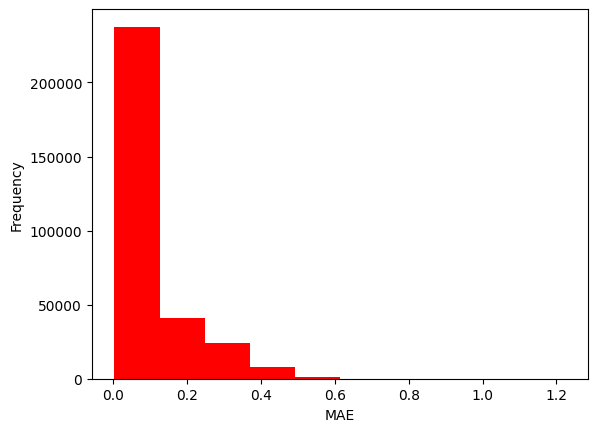

In [8]:
plt.hist(loss,color='red')
plt.xlabel('MAE')
plt.ylabel('Frequency')
plt.show()

C:\Users\tanus\AppData\Local\Temp\ipykernel_1136\2745629808.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loss,kde=True,color='blue')


<Axes: ylabel='Density'>

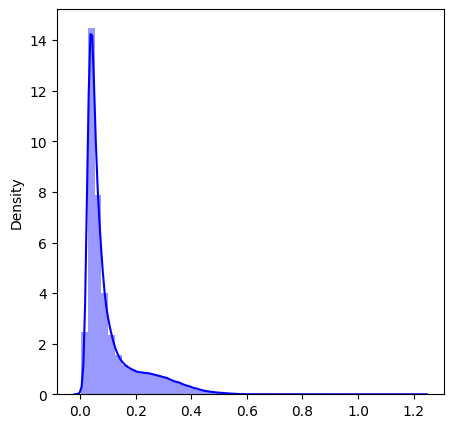

In [9]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.distplot(loss,kde=True,color='blue')

In [10]:
test_pred=autoencoder.predict(test_data)
test_pred=test_pred.reshape(test_pred.shape[0],test_pred.shape[1])

4466/4466 [==============================] - 5s 1ms/step


In [11]:
test=test_data.values.reshape(test_data.shape[0],test_data.shape[1])

C:\Users\tanus\AppData\Local\Temp\ipykernel_1136\4209743378.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loss,kde=True,color='red',label='Training Loss')
C:\Users\tanus\AppData\Local\Temp\ipykernel_1136\4209743378.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_loss,kde=True,colo

<Axes: ylabel='Density'>

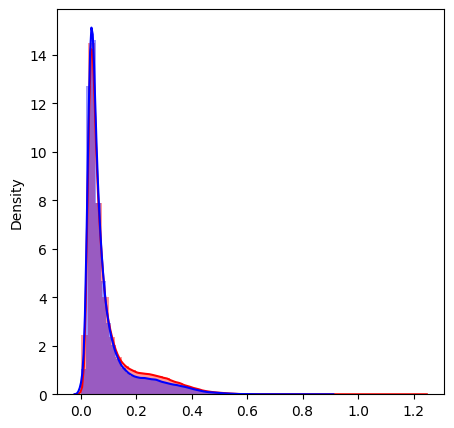

In [12]:
test_loss=np.mean(np.abs(test_pred-test),axis=1)
plt.figure(figsize=(5,5))
sns.distplot(loss,kde=True,color='red',label='Training Loss')
sns.distplot(test_loss,kde=True,color='blue',label='Testing Loss')

In [13]:
anomaly=pd.DataFrame()
anomaly.index = testing['Date and time']
anomaly['Test MAE']=test_loss
#threshold
anomaly['Threshold']=np.mean(test_loss)+4*np.std(test_loss)
anomaly['Status']=anomaly['Test MAE']>anomaly['Threshold']

anomaly

,Test MAE,Threshold,Status
Date and time,,,
01-01-2021 00:00,0.019906,0.448078,False
01-01-2021 00:10,0.233051,0.448078,False
01-01-2021 00:20,0.148113,0.448078,False
01-01-2021 00:30,0.059294,0.448078,False
01-01-2021 00:40,0.184701,0.448078,False
...,...,...,...
16-06-2021 07:40,0.061802,0.448078,False
16-06-2021 07:50,0.045330,0.448078,False
16-06-2021 08:00,0.026519,0.448078,False


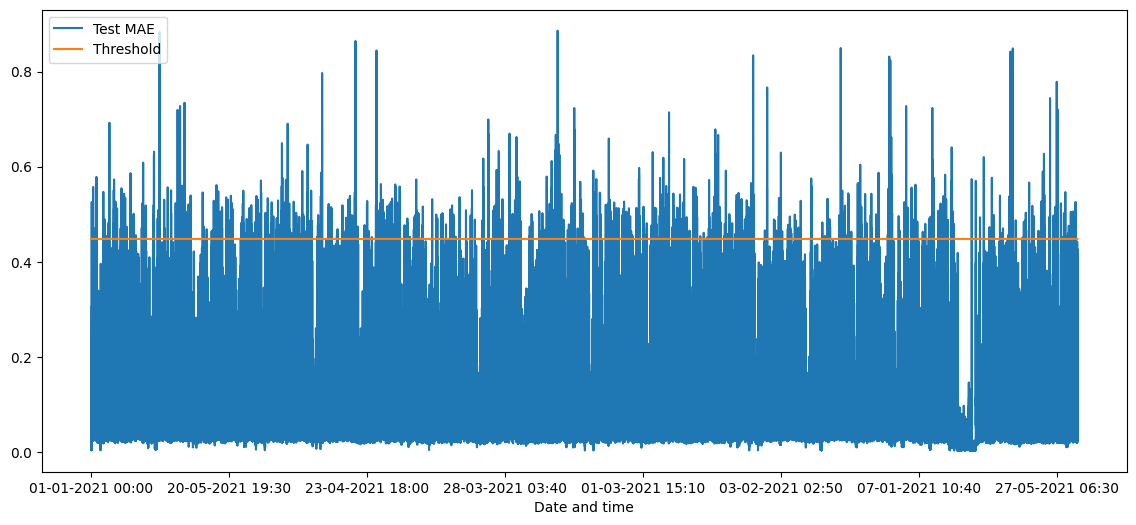

In [14]:
anomaly[['Test MAE', 'Threshold']].plot(figsize=(14, 6))
plt.show()

In [15]:
test

array([[1.74424998e+01, 1.76000004e+01, 1.73999996e+01, 5.76088190e-02],
       [1.82199998e+01, 1.97000008e+01, 1.73999996e+01, 9.15205137e-01],
       [1.82299999e+01, 1.96000004e+01, 1.76000004e+01, 5.58659174e-01],
       ...,
       [5.73750006e+01, 5.74000015e+01, 5.72999992e+01, 3.70820980e-02],
       [5.72394740e+01, 5.74000015e+01, 5.70000000e+01, 1.76649887e-01],
       [5.65099995e+01, 5.67999992e+01, 5.60000000e+01, 2.31624555e-01]])

In [16]:
train

array([[5.69724997e+01, 5.70999985e+01, 5.67999992e+01, 9.54920670e-02],
       [5.66950006e+01, 5.67500000e+01, 5.65999985e+01, 3.84056150e-02],
       [5.66400003e+01, 5.67000008e+01, 5.64000015e+01, 6.81912110e-02],
       ...,
       [5.07425001e+01, 5.07999992e+01, 5.07000008e+01, 4.81526660e-02],
       [5.07999992e+01, 5.07999992e+01, 5.07999992e+01, 2.13000000e-14],
       [5.07724997e+01, 5.07999992e+01, 5.07000008e+01, 3.69960570e-02]])

In [17]:
train_df = pd.DataFrame(train,columns=['Gear oil temperature (°C)','Gear oil temperature, Max (°C)','Gear oil temperature, Min (°C)','Gear oil temperature, Standard deviation (°C)'], index=training['Date and time'])
test_df = pd.DataFrame(test,columns=['Gear oil temperature (°C)','Gear oil temperature, Max (°C)','Gear oil temperature, Min (°C)','Gear oil temperature, Standard deviation (°C)'], index=testing['Date and time'])

In [18]:
train_df

,Gear oil temperature (°C),"Gear oil temperature, Max (°C)","Gear oil temperature, Min (°C)","Gear oil temperature, Standard deviation (°C)"
Date and time,,,,
01-01-2020 00:00,56.972500,57.099998,56.799999,9.549207e-02
01-01-2020 00:10,56.695001,56.750000,56.599998,3.840561e-02
01-01-2020 00:20,56.640000,56.700001,56.400002,6.819121e-02
01-01-2020 00:30,56.432500,56.650002,56.299999,1.028044e-01
01-01-2020 00:40,56.169998,56.349998,56.049999,9.797955e-02
...,...,...,...,...
31-12-2020 23:10,50.830000,51.000000,50.799999,6.403169e-02
31-12-2020 23:20,50.792500,50.900002,50.700001,6.759271e-02
31-12-2020 23:30,50.742500,50.799999,50.700001,4.815267e-02


In [19]:
test_df

,Gear oil temperature (°C),"Gear oil temperature, Max (°C)","Gear oil temperature, Min (°C)","Gear oil temperature, Standard deviation (°C)"
Date and time,,,,
01-01-2021 00:00,17.442500,17.600000,17.400000,0.057609
01-01-2021 00:10,18.220000,19.700001,17.400000,0.915205
01-01-2021 00:20,18.230000,19.600000,17.600000,0.558659
01-01-2021 00:30,17.485000,17.799999,17.100000,0.212779
01-01-2021 00:40,17.785000,18.900000,17.100000,0.721474
...,...,...,...,...
16-06-2021 07:40,57.497499,57.700001,57.049999,0.178518
16-06-2021 07:50,57.591667,57.750000,57.400002,0.113345
16-06-2021 08:00,57.375001,57.400002,57.299999,0.037082


Building the LSTM Model

In [20]:
train_df = train_df.drop(['Gear oil temperature, Min (°C)','Gear oil temperature, Max (°C)','Gear oil temperature, Standard deviation (°C)'], axis=1)
test_df = test_df.drop(['Gear oil temperature, Min (°C)','Gear oil temperature, Max (°C)', 'Gear oil temperature, Standard deviation (°C)'], axis=1)

In [21]:
test_df

,Gear oil temperature (°C)
Date and time,
01-01-2021 00:00,17.442500
01-01-2021 00:10,18.220000
01-01-2021 00:20,18.230000
01-01-2021 00:30,17.485000
01-01-2021 00:40,17.785000
...,...
16-06-2021 07:40,57.497499
16-06-2021 07:50,57.591667
16-06-2021 08:00,57.375001


In [22]:
train_df

,Gear oil temperature (°C)
Date and time,
01-01-2020 00:00,56.972500
01-01-2020 00:10,56.695001
01-01-2020 00:20,56.640000
01-01-2020 00:30,56.432500
01-01-2020 00:40,56.169998
...,...
31-12-2020 23:10,50.830000
31-12-2020 23:20,50.792500
31-12-2020 23:30,50.742500


<Axes: xlabel='Date and time'>

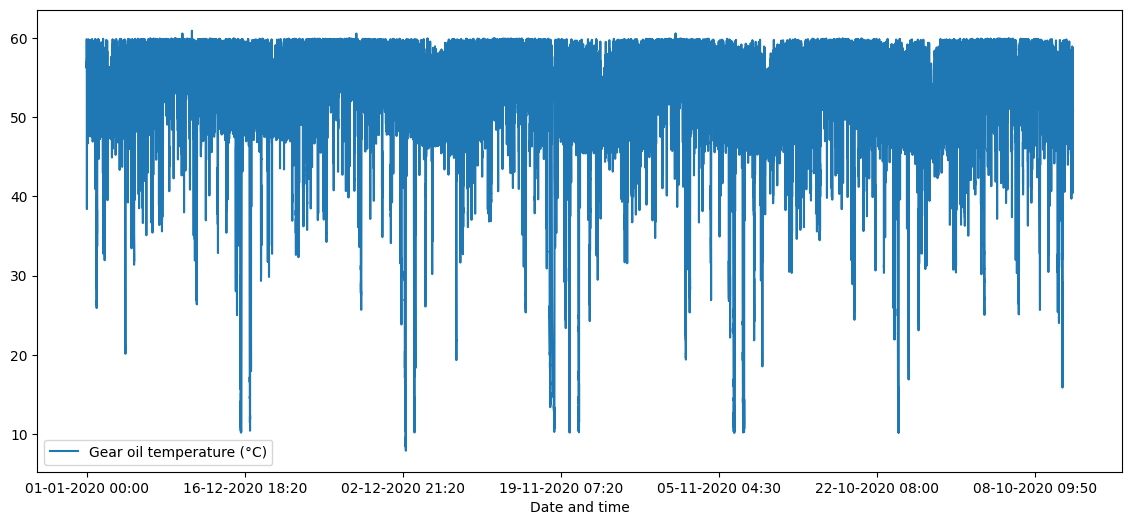

In [23]:
train_df[['Gear oil temperature (°C)']].plot(figsize=(14, 6))

<Axes: xlabel='Date and time'>

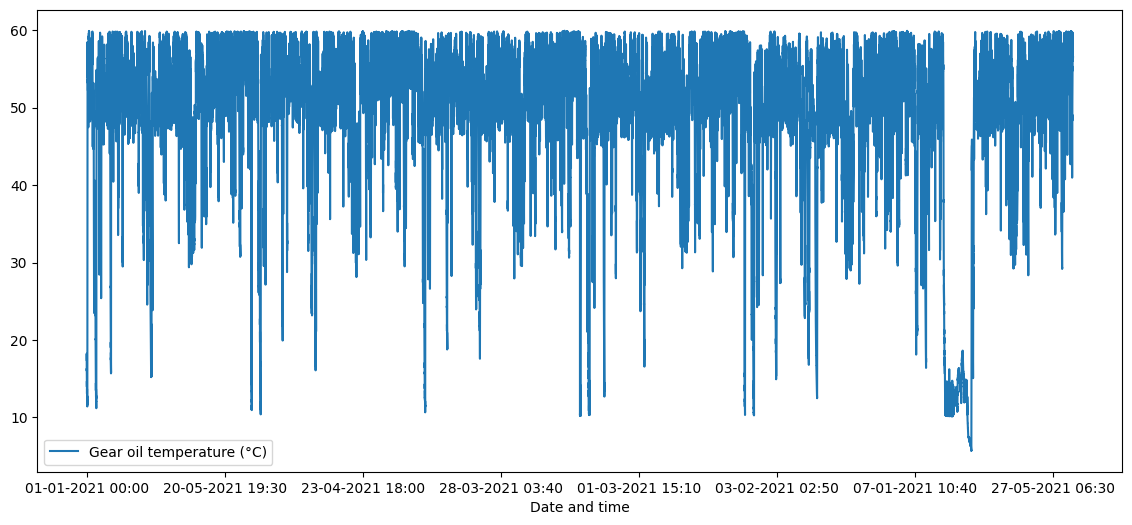

In [24]:
test_df[['Gear oil temperature (°C)']].plot(figsize=(14, 6))

In [25]:
train_df.rename(columns={'Gear oil temperature (°C)':'y'}, inplace=True)
test_df.rename(columns={'Gear oil temperature (°C)':'y'}, inplace=True)

In [26]:
train_df

,y
Date and time,
01-01-2020 00:00,56.972500
01-01-2020 00:10,56.695001
01-01-2020 00:20,56.640000
01-01-2020 00:30,56.432500
01-01-2020 00:40,56.169998
...,...
31-12-2020 23:10,50.830000
31-12-2020 23:20,50.792500
31-12-2020 23:30,50.742500


In [27]:
test_df

,y
Date and time,
01-01-2021 00:00,17.442500
01-01-2021 00:10,18.220000
01-01-2021 00:20,18.230000
01-01-2021 00:30,17.485000
01-01-2021 00:40,17.785000
...,...
16-06-2021 07:40,57.497499
16-06-2021 07:50,57.591667
16-06-2021 08:00,57.375001


In [28]:
train_df['x1']= train_df['y'].shift()
train_df['x2']= train_df['y'].shift(2)
train_df['x3']= train_df['y'].shift(3)

In [29]:
test_df['x1']= test_df['y'].shift()
test_df['x2']= test_df['y'].shift(2)
test_df['x3']= test_df['y'].shift(3)

In [30]:
train_df

,y,x1,x2,x3
Date and time,,,,
01-01-2020 00:00,56.972500,NaN,NaN,NaN
01-01-2020 00:10,56.695001,56.972500,NaN,NaN
01-01-2020 00:20,56.640000,56.695001,56.972500,NaN
01-01-2020 00:30,56.432500,56.640000,56.695001,56.972500
01-01-2020 00:40,56.169998,56.432500,56.640000,56.695001
...,...,...,...,...
31-12-2020 23:10,50.830000,50.880000,51.015000,51.052500
31-12-2020 23:20,50.792500,50.830000,50.880000,51.015000
31-12-2020 23:30,50.742500,50.792500,50.830000,50.880000


In [31]:
test_df

,y,x1,x2,x3
Date and time,,,,
01-01-2021 00:00,17.442500,NaN,NaN,NaN
01-01-2021 00:10,18.220000,17.442500,NaN,NaN
01-01-2021 00:20,18.230000,18.220000,17.442500,NaN
01-01-2021 00:30,17.485000,18.230000,18.220000,17.442500
01-01-2021 00:40,17.785000,17.485000,18.230000,18.220000
...,...,...,...,...
16-06-2021 07:40,57.497499,56.885000,56.445000,56.434210
16-06-2021 07:50,57.591667,57.497499,56.885000,56.445000
16-06-2021 08:00,57.375001,57.591667,57.497499,56.885000


In [32]:
x_train = train_df
x_train

,y,x1,x2,x3
Date and time,,,,
01-01-2020 00:00,56.972500,NaN,NaN,NaN
01-01-2020 00:10,56.695001,56.972500,NaN,NaN
01-01-2020 00:20,56.640000,56.695001,56.972500,NaN
01-01-2020 00:30,56.432500,56.640000,56.695001,56.972500
01-01-2020 00:40,56.169998,56.432500,56.640000,56.695001
...,...,...,...,...
31-12-2020 23:10,50.830000,50.880000,51.015000,51.052500
31-12-2020 23:20,50.792500,50.830000,50.880000,51.015000
31-12-2020 23:30,50.742500,50.792500,50.830000,50.880000


In [33]:
x_train = train_df.iloc[3:,1:]
y_train = train_df.iloc[3:,:1]

x_test = test_df.iloc[3:,1:]
y_test = test_df.iloc[3:,:1]

In [34]:
train_df.to_csv('time_series_train_data.csv')
test_df.to_csv('time_series_test_data.csv')

In [35]:
n_samples = x_train.values.shape[0]
n_timestamps = 1
n_features = x_train.values.shape[1]

In [36]:
x_train = x_train.values.reshape(n_samples, n_timestamps, n_features)

In [38]:
lstm_model = Sequential()

lstm_model.add(LSTM(64, input_shape =(n_timestamps, n_features)))
# lstm_model.add(Dense(32, activation='relu')) 
lstm_model.add(Dense(1, activation='relu')) 
lstm_model.compile(loss='mse', optimizer='adam')
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                17408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________


In [39]:
history = lstm_model.fit(x_train, y_train, epochs=50, batch_size=64,validation_split=0.25, shuffle=True).history

Epoch 1/50
3656/3656 [==============================] - 12s 3ms/step - loss: 246.0872 - val_loss: 2.4154
Epoch 2/50
3656/3656 [==============================] - 9s 2ms/step - loss: 1.5318 - val_loss: 1.1658
Epoch 3/50
3656/3656 [==============================] - 9s 2ms/step - loss: 1.1877 - val_loss: 0.9588
Epoch 4/50
3656/3656 [==============================] - 9s 3ms/step - loss: 1.1582 - val_loss: 1.0459
Epoch 5/50
3656/3656 [==============================] - 12s 3ms/step - loss: 1.1392 - val_loss: 0.9809
Epoch 6/50
3656/3656 [==============================] - 10s 3ms/step - loss: 1.1234 - val_loss: 0.9423
Epoch 7/50
3656/3656 [==============================] - 10s 3ms/step - loss: 1.1320 - val_loss: 0.9411
Epoch 8/50
3656/3656 [==============================] - 10s 3ms/step - loss: 1.1298 - val_loss: 1.0601
Epoch 9/50
3656/3656 [==============================] - 9s 3ms/step - loss: 1.1183 - val_loss: 0.9923
Epoch 10/50
3656/3656 [==============================] - 9s 2ms/step - loss

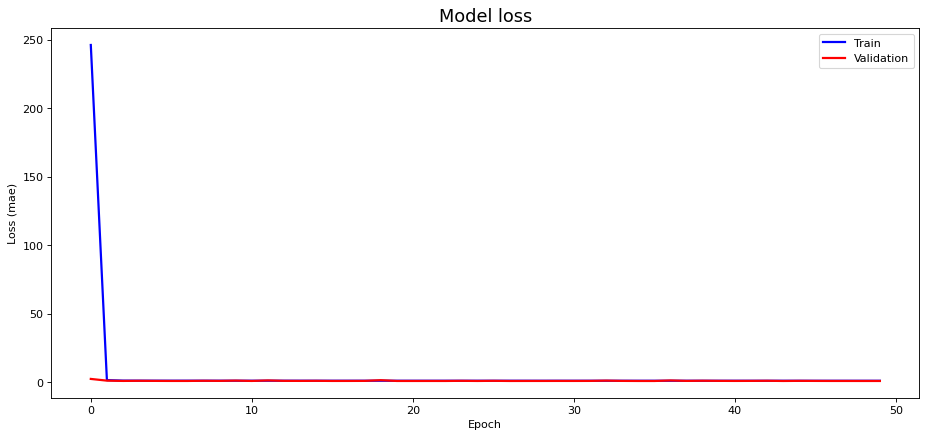

In [40]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80,)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [41]:
train_pred=lstm_model.predict(x_train)
train_pred

9748/9748 [==============================] - 12s 1ms/step


array([[56.783363],
       [56.589478],
       [56.384315],
       ...,
       [50.959877],
       [50.90689 ],
       [50.967033]], dtype=float32)

In [42]:
x_test = x_test.values.reshape(x_test.shape[0], 1, x_test.shape[1])

In [43]:
test_pred=lstm_model.predict(x_test)
test_pred

4466/4466 [==============================] - 6s 1ms/step


array([[18.085152],
       [17.355629],
       [17.896046],
       ...,
       [57.448433],
       [57.407597],
       [57.324112]], dtype=float32)

In [44]:
model_json = lstm_model.to_json()
with open("lstm_model.json", "w") as json_file:
    json_file.write(model_json)

lstm_model.save_weights("lstm_model.h5")